##### Implementing new forge class

In [1]:
import time
import os
import pandas as pd
import pickle
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
drug_hcg = pd.read_csv("/home/nilabjab/cancer_dependency_project_nilabja/cancer_dependency_project/Approach3_Latent_factor/Fresh_FORGE/Data/drug_hcg_data.csv", index_col=0)
drug_hcg.head()

,HCG_list
Drug,
ABIRATERONE,"AASDHPPT,AASDHPPT-AS1,ABI2,ABRAXAS2,ACAT1,ACOT..."
ABT-751,"A1BG,AATK,ABALON,ABCC11,ABCC3,ABCF1,ACE2,ACKR4..."
AFATINIB,"ACE2,ADGRF1,AHDC1,ALS2CL,ANLN,ANO1,ANXA3,ANXA5..."
AFURESERTIB,"AADAT,ABI2,ABT1,ACP1,ACSF3,AEN,AHNAK,AK1,AK5,A..."
ALECTINIB,"ACD,ADAM23,ADAM9,ADAMTS15,ADPRM,AFAP1,AGR2,ALK..."


In [3]:
# get HCGs for EGFR-ERLOTINIB pair
drug_name = 'ERLOTINIB'
target_gene = 'EGFR'

In [4]:
hcg_list = drug_hcg.loc[drug_name].str.split(',').iloc[0]
len(hcg_list)

201

The above exp_data has HCGs for both drug IC50 and gene dependency

In [5]:
exp_path = "/home/nilabjab/cancer_dependency_project_nilabja/cancer_dependency_project/Approach3_Latent_factor/Fresh_FORGE/Data/Exp.csv"
dep_path = "/home/nilabjab/cancer_dependency_project_nilabja/cancer_dependency_project/Approach3_Latent_factor/Fresh_FORGE/Data/Dep.csv"
ic50_path = "/home/nilabjab/cancer_dependency_project_nilabja/cancer_dependency_project/Approach3_Latent_factor/Fresh_FORGE/Data/Creammist_common_ic50.csv"

In [6]:
from forge_class_instance2 import *

/home/sreeramp/miniconda3/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [7]:
test_instance2 = FORGE(exp_path=exp_path, dependency_path=dep_path, ic50_path=ic50_path,
                       drug_name='ERLOTINIB', target_name='EGFR', hcg_list=hcg_list)


Cleaning the input datasets..
Identified a total of 687 samples in input data


In [8]:
test_instance2.run_Pipeline(n_splits=5, seed_val=198716, tuning_epochs=100, training_epochs=500,
                            optuna_trials=30, model_path='full_pipeline_t2.pkl')


Performing k-fold split over 687 samples...
Running for fold: 0
Experiment setup: Train=440, Val=110, Test=137
Scaling the matrices...
Starting FORGE training with single random instance of W..
Tuning hyper-params..

--- Starting Optuna search for ERLOTINIB - EGFR ---


[I 2025-11-21 13:40:01,782] Using an existing study with name 'ERLOTINIB-EGFR_optuna_198716' instead of creating a new one.
[I 2025-11-21 13:40:02,046] Trial 678 finished with value: 2.4902801032679998 and parameters: {'latent_dim': 20, 'learning_rate': 0.00012530292267394684, 'lambda': 0.0018387204688805213}. Best is trial 104 with value: 1.5995766706508503.
[I 2025-11-21 13:40:02,181] Trial 679 finished with value: 2.4803901764431906 and parameters: {'latent_dim': 20, 'learning_rate': 0.00011374445512096986, 'lambda': 0.0009155991419780982}. Best is trial 104 with value: 1.5995766706508503.


Epoch 100: Training loss:
  Dependency: 0.00003
   IC50: -0.00363
Validation loss at end of trial 678: 2.49028
Epoch 100: Training loss:
  Dependency: 0.00007
   IC50: -0.00403
Validation loss at end of trial 679: 2.48039


[I 2025-11-21 13:40:02,345] Trial 680 finished with value: 2.353174232703924 and parameters: {'latent_dim': 30, 'learning_rate': 0.00015722548329587894, 'lambda': 0.0029552039979435243}. Best is trial 104 with value: 1.5995766706508503.
[I 2025-11-21 13:40:02,455] Trial 681 finished with value: 2.4986305661956036 and parameters: {'latent_dim': 20, 'learning_rate': 0.0001353619904432301, 'lambda': 0.004622476280783614}. Best is trial 104 with value: 1.5995766706508503.


Epoch 100: Training loss:
  Dependency: 0.00179
   IC50: 0.00152
Validation loss at end of trial 680: 2.35317
Epoch 100: Training loss:
  Dependency: -0.00001
   IC50: -0.00331
Validation loss at end of trial 681: 2.49863


[I 2025-11-21 13:40:02,595] Trial 682 finished with value: 2.481643871399264 and parameters: {'latent_dim': 20, 'learning_rate': 0.00011518590631639765, 'lambda': 0.0016396254184186353}. Best is trial 104 with value: 1.5995766706508503.
[I 2025-11-21 13:40:02,766] Trial 683 finished with value: 2.530458726033702 and parameters: {'latent_dim': 20, 'learning_rate': 0.00017651792777311772, 'lambda': 0.0038667889733281203}. Best is trial 104 with value: 1.5995766706508503.


Epoch 100: Training loss:
  Dependency: 0.00006
   IC50: -0.00397
Validation loss at end of trial 682: 2.48164
Epoch 100: Training loss:
  Dependency: -0.00011
   IC50: -0.00231
Validation loss at end of trial 683: 2.53046


[I 2025-11-21 13:40:02,887] Trial 684 finished with value: 2.50806529191136 and parameters: {'latent_dim': 20, 'learning_rate': 0.0001471087866553413, 'lambda': 0.00334502812439693}. Best is trial 104 with value: 1.5995766706508503.
[I 2025-11-21 13:40:03,027] Trial 685 finished with value: 2.480056012383072 and parameters: {'latent_dim': 20, 'learning_rate': 0.00011335578521471341, 'lambda': 0.0020942430987961895}. Best is trial 104 with value: 1.5995766706508503.


Epoch 100: Training loss:
  Dependency: -0.00004
   IC50: -0.00298
Validation loss at end of trial 684: 2.50807
Epoch 100: Training loss:
  Dependency: 0.00007
   IC50: -0.00404
Validation loss at end of trial 685: 2.48006


[I 2025-11-21 13:40:03,153] Trial 686 finished with value: 2.491054617676172 and parameters: {'latent_dim': 20, 'learning_rate': 0.0001262010258750258, 'lambda': 0.006828874162390313}. Best is trial 104 with value: 1.5995766706508503.
[I 2025-11-21 13:40:03,281] Trial 687 finished with value: 2.5023462821279012 and parameters: {'latent_dim': 20, 'learning_rate': 0.0001399587664222796, 'lambda': 0.001238314399257263}. Best is trial 104 with value: 1.5995766706508503.


Epoch 100: Training loss:
  Dependency: 0.00002
   IC50: -0.00360
Validation loss at end of trial 686: 2.49105
Epoch 100: Training loss:
  Dependency: -0.00002
   IC50: -0.00318
Validation loss at end of trial 687: 2.50235


[I 2025-11-21 13:40:03,415] Trial 688 finished with value: 2.4682382985965026 and parameters: {'latent_dim': 20, 'learning_rate': 0.00010003881910489014, 'lambda': 0.002729881233491767}. Best is trial 104 with value: 1.5995766706508503.
[I 2025-11-21 13:40:03,550] Trial 689 finished with value: 2.5788972873300158 and parameters: {'latent_dim': 20, 'learning_rate': 0.0002468751620133589, 'lambda': 0.0015043321284223421}. Best is trial 104 with value: 1.5995766706508503.


Epoch 100: Training loss:
  Dependency: 0.00013
   IC50: -0.00453
Validation loss at end of trial 688: 2.46824
Epoch 100: Training loss:
  Dependency: -0.00021
   IC50: -0.00142
Validation loss at end of trial 689: 2.57890


[I 2025-11-21 13:40:03,755] Trial 690 finished with value: 2.550014916532253 and parameters: {'latent_dim': 20, 'learning_rate': 0.00020389429355653578, 'lambda': 0.005568217255492275}. Best is trial 104 with value: 1.5995766706508503.
[I 2025-11-21 13:40:03,874] Trial 691 finished with value: 2.479530950304052 and parameters: {'latent_dim': 20, 'learning_rate': 0.00011274437635229245, 'lambda': 0.00437790123988315}. Best is trial 104 with value: 1.5995766706508503.


Epoch 100: Training loss:
  Dependency: -0.00016
   IC50: -0.00186
Validation loss at end of trial 690: 2.55001
Epoch 100: Training loss:
  Dependency: 0.00007
   IC50: -0.00406
Validation loss at end of trial 691: 2.47953


[I 2025-11-21 13:40:04,014] Trial 692 finished with value: 2.4894396524263436 and parameters: {'latent_dim': 20, 'learning_rate': 0.000124302732464422, 'lambda': 0.0023376747544233485}. Best is trial 104 with value: 1.5995766706508503.
[I 2025-11-21 13:40:04,139] Trial 693 finished with value: 2.5237518107738315 and parameters: {'latent_dim': 20, 'learning_rate': 0.0001675068885139975, 'lambda': 0.0007514732587070923}. Best is trial 104 with value: 1.5995766706508503.


Epoch 100: Training loss:
  Dependency: 0.00003
   IC50: -0.00366
Validation loss at end of trial 692: 2.48944
Epoch 100: Training loss:
  Dependency: -0.00009
   IC50: -0.00249
Validation loss at end of trial 693: 2.52375


[I 2025-11-21 13:40:04,272] Trial 694 finished with value: 2.501872685641848 and parameters: {'latent_dim': 20, 'learning_rate': 0.00013936799565276826, 'lambda': 0.0019196196638443905}. Best is trial 104 with value: 1.5995766706508503.
[I 2025-11-21 13:40:04,385] Trial 695 finished with value: 2.439688325358066 and parameters: {'latent_dim': 10, 'learning_rate': 0.00011090154682252187, 'lambda': 0.003058779961507018}. Best is trial 104 with value: 1.5995766706508503.


Epoch 100: Training loss:
  Dependency: -0.00002
   IC50: -0.00320
Validation loss at end of trial 694: 2.50187
Epoch 100: Training loss:
  Dependency: -0.00033
   IC50: 0.00383
Validation loss at end of trial 695: 2.43969


[I 2025-11-21 13:40:04,518] Trial 696 finished with value: 2.4896029339451804 and parameters: {'latent_dim': 20, 'learning_rate': 0.00012450066602337116, 'lambda': 0.0014207565944125563}. Best is trial 104 with value: 1.5995766706508503.
[I 2025-11-21 13:40:04,661] Trial 697 finished with value: 2.5147574657452187 and parameters: {'latent_dim': 20, 'learning_rate': 0.00015568672829257863, 'lambda': 0.0011071056829670555}. Best is trial 104 with value: 1.5995766706508503.


Epoch 100: Training loss:
  Dependency: 0.00003
   IC50: -0.00366
Validation loss at end of trial 696: 2.48960
Epoch 100: Training loss:
  Dependency: -0.00006
   IC50: -0.00276
Validation loss at end of trial 697: 2.51476


[I 2025-11-21 13:40:04,851] Trial 698 finished with value: 2.2825549294057734 and parameters: {'latent_dim': 40, 'learning_rate': 0.00010064691260190477, 'lambda': 0.0037972573850170283}. Best is trial 104 with value: 1.5995766706508503.
[I 2025-11-21 13:40:04,974] Trial 699 finished with value: 2.4797558505102577 and parameters: {'latent_dim': 20, 'learning_rate': 0.00011301303267566158, 'lambda': 0.00165000548205162}. Best is trial 104 with value: 1.5995766706508503.


Epoch 100: Training loss:
  Dependency: 0.00079
   IC50: 0.00430
Validation loss at end of trial 698: 2.28255
Epoch 100: Training loss:
  Dependency: 0.00007
   IC50: -0.00405
Validation loss at end of trial 699: 2.47976


[I 2025-11-21 13:40:05,087] Trial 700 finished with value: 2.4977154241807575 and parameters: {'latent_dim': 20, 'learning_rate': 0.00013425040609338, 'lambda': 0.0033955842094465336}. Best is trial 104 with value: 1.5995766706508503.
[I 2025-11-21 13:40:05,225] Trial 701 finished with value: 2.5361575521232247 and parameters: {'latent_dim': 20, 'learning_rate': 0.00018435621987050968, 'lambda': 0.0025735561607203514}. Best is trial 104 with value: 1.5995766706508503.


Epoch 100: Training loss:
  Dependency: -0.00000
   IC50: -0.00335
Validation loss at end of trial 700: 2.49772
Epoch 100: Training loss:
  Dependency: -0.00013
   IC50: -0.00216
Validation loss at end of trial 701: 2.53616


[I 2025-11-21 13:40:05,335] Trial 702 finished with value: 2.479729720219637 and parameters: {'latent_dim': 20, 'learning_rate': 0.00011297029302844566, 'lambda': 0.004881660869535255}. Best is trial 104 with value: 1.5995766706508503.


Epoch 100: Training loss:
  Dependency: 0.00007
   IC50: -0.00405
Validation loss at end of trial 702: 2.47973


[I 2025-11-21 13:40:05,571] Trial 703 finished with value: 3.0498473936100283 and parameters: {'latent_dim': 50, 'learning_rate': 0.0001458333469179406, 'lambda': 0.0029398909072187577}. Best is trial 104 with value: 1.5995766706508503.
[I 2025-11-21 13:40:05,734] Trial 704 finished with value: 2.491520141272218 and parameters: {'latent_dim': 20, 'learning_rate': 0.00012678292057975553, 'lambda': 0.0013382189252639548}. Best is trial 104 with value: 1.5995766706508503.


Epoch 100: Training loss:
  Dependency: 0.00023
   IC50: 0.00201
Validation loss at end of trial 703: 3.04985
Epoch 100: Training loss:
  Dependency: 0.00002
   IC50: -0.00358
Validation loss at end of trial 704: 2.49152


[I 2025-11-21 13:40:05,889] Trial 705 finished with value: 2.2610666355191142 and parameters: {'latent_dim': 30, 'learning_rate': 0.00010048869114690978, 'lambda': 0.0019394841755472918}. Best is trial 104 with value: 1.5995766706508503.
[I 2025-11-21 13:40:06,042] Trial 706 finished with value: 5.8119166748110525 and parameters: {'latent_dim': 20, 'learning_rate': 0.003500446672774915, 'lambda': 0.00411433716904894}. Best is trial 104 with value: 1.5995766706508503.


Epoch 100: Training loss:
  Dependency: 0.00175
   IC50: 0.00321
Validation loss at end of trial 705: 2.26107
Epoch 100: Training loss:
  Dependency: 0.00030
   IC50: -0.00477
Validation loss at end of trial 706: 5.81192


[I 2025-11-21 13:40:06,166] Trial 707 finished with value: 2.489168089666181 and parameters: {'latent_dim': 20, 'learning_rate': 0.00012398418650646218, 'lambda': 0.0016409333155141537}. Best is trial 104 with value: 1.5995766706508503.


Epoch 100: Training loss:
  Dependency: 0.00003
   IC50: -0.00367
Validation loss at end of trial 707: 2.48917
Hyper-param tuning completed in 4.380550146102905 seconds..
Best hyper-params:
{'latent_dim': 20, 'learning_rate': 0.00010000399525889625, 'lambda': 0.0017564075466134736}
Training using the best hyper-params..
Epoch 100: Training loss:
  Dependency: 0.00149
   IC50: -0.00108
Epoch 200: Training loss:
  Dependency: 0.00145
   IC50: -0.00152


[I 2025-11-21 13:40:06,523] Using an existing study with name 'ERLOTINIB-EGFR_optuna_198716' instead of creating a new one.


Epoch 300: Training loss:
  Dependency: 0.00141
   IC50: -0.00150
Epoch 400: Training loss:
  Dependency: 0.00136
   IC50: -0.00105
Epoch 500: Training loss:
  Dependency: 0.00132
   IC50: -0.00038
Final training loss for fold 0: 1.67580. Validation loss for fold 0: 2.95831
Tuning completed for fold: 0
FORGE training completed in 4.926577568054199 seconds..Running test..
Final test loss for fold 0: 2.92923. 
{'dep_pearson_corr': 0.48763, 'dep_spearman_corr': 0.41239, 'ic50_pearson_corr': 0.31561, 'ic50_spearman_corr': 0.30296, 'dep_MSE': 0.08252, 'ic50_MSE': 5.77593}
Running for fold: 1
Experiment setup: Train=440, Val=110, Test=137
Scaling the matrices...
Starting FORGE training with single random instance of W..
Tuning hyper-params..

--- Starting Optuna search for ERLOTINIB - EGFR ---


[I 2025-11-21 13:40:06,765] Trial 708 finished with value: 1.8614394159018897 and parameters: {'latent_dim': 20, 'learning_rate': 0.00016245339704589064, 'lambda': 0.0022430839031925805}. Best is trial 104 with value: 1.5995766706508503.
[I 2025-11-21 13:40:06,907] Trial 709 finished with value: 1.878804928618959 and parameters: {'latent_dim': 20, 'learning_rate': 0.00010036705522337197, 'lambda': 0.003492012635115242}. Best is trial 104 with value: 1.5995766706508503.


Epoch 100: Training loss:
  Dependency: -0.00243
   IC50: -0.00294
Validation loss at end of trial 708: 1.86144
Epoch 100: Training loss:
  Dependency: -0.00219
   IC50: -0.00369
Validation loss at end of trial 709: 1.87880


[I 2025-11-21 13:40:07,020] Trial 710 finished with value: 1.864529707153588 and parameters: {'latent_dim': 20, 'learning_rate': 0.0001450342123076651, 'lambda': 0.00020307997089994169}. Best is trial 104 with value: 1.5995766706508503.
[I 2025-11-21 13:40:07,140] Trial 711 finished with value: 1.8735936518833032 and parameters: {'latent_dim': 20, 'learning_rate': 0.00011369890698734125, 'lambda': 0.0027181287704964655}. Best is trial 104 with value: 1.5995766706508503.


Epoch 100: Training loss:
  Dependency: -0.00237
   IC50: -0.00315
Validation loss at end of trial 710: 1.86453
Epoch 100: Training loss:
  Dependency: -0.00224
   IC50: -0.00353
Validation loss at end of trial 711: 1.87359


[I 2025-11-21 13:40:07,276] Trial 712 finished with value: 1.870109275478178 and parameters: {'latent_dim': 20, 'learning_rate': 0.00012402793663627147, 'lambda': 0.0012404083247084118}. Best is trial 104 with value: 1.5995766706508503.
[I 2025-11-21 13:40:07,415] Trial 713 finished with value: 1.8738365181205947 and parameters: {'latent_dim': 20, 'learning_rate': 0.00011302834301844873, 'lambda': 0.0031308186440479314}. Best is trial 104 with value: 1.5995766706508503.


Epoch 100: Training loss:
  Dependency: -0.00228
   IC50: -0.00341
Validation loss at end of trial 712: 1.87011
Epoch 100: Training loss:
  Dependency: -0.00224
   IC50: -0.00354
Validation loss at end of trial 713: 1.87384


[I 2025-11-21 13:40:07,571] Trial 714 finished with value: 1.8789298199512567 and parameters: {'latent_dim': 20, 'learning_rate': 0.0001000718329924687, 'lambda': 0.0018497679815793542}. Best is trial 104 with value: 1.5995766706508503.
[I 2025-11-21 13:40:07,686] Trial 715 finished with value: 1.8664100844130493 and parameters: {'latent_dim': 20, 'learning_rate': 0.00013698860752807472, 'lambda': 0.03271463633408733}. Best is trial 104 with value: 1.5995766706508503.


Epoch 100: Training loss:
  Dependency: -0.00219
   IC50: -0.00369
Validation loss at end of trial 714: 1.87893
Epoch 100: Training loss:
  Dependency: -0.00233
   IC50: -0.00325
Validation loss at end of trial 715: 1.86641


[I 2025-11-21 13:40:07,827] Trial 716 finished with value: 1.8594830539461913 and parameters: {'latent_dim': 20, 'learning_rate': 0.00018548806028154474, 'lambda': 0.0038172518129388987}. Best is trial 104 with value: 1.5995766706508503.
[I 2025-11-21 13:40:07,938] Trial 717 finished with value: 1.863206173837158 and parameters: {'latent_dim': 20, 'learning_rate': 0.00015157378716086186, 'lambda': 0.0009906947820890757}. Best is trial 104 with value: 1.5995766706508503.


Epoch 100: Training loss:
  Dependency: -0.00251
   IC50: -0.00267
Validation loss at end of trial 716: 1.85948
Epoch 100: Training loss:
  Dependency: -0.00239
   IC50: -0.00307
Validation loss at end of trial 717: 1.86321


[I 2025-11-21 13:40:08,083] Trial 718 finished with value: 1.870082516878255 and parameters: {'latent_dim': 20, 'learning_rate': 0.0001241129513127625, 'lambda': 0.0014438699372876093}. Best is trial 104 with value: 1.5995766706508503.
[I 2025-11-21 13:40:08,232] Trial 719 finished with value: 1.8729015781654192 and parameters: {'latent_dim': 20, 'learning_rate': 0.00011564099454533337, 'lambda': 0.0021081685537888565}. Best is trial 104 with value: 1.5995766706508503.


Epoch 100: Training loss:
  Dependency: -0.00228
   IC50: -0.00341
Validation loss at end of trial 718: 1.87008
Epoch 100: Training loss:
  Dependency: -0.00225
   IC50: -0.00351
Validation loss at end of trial 719: 1.87290


[I 2025-11-21 13:40:08,367] Trial 720 finished with value: 1.8788874169266399 and parameters: {'latent_dim': 20, 'learning_rate': 0.0001001719040567288, 'lambda': 0.002496783432572207}. Best is trial 104 with value: 1.5995766706508503.
[I 2025-11-21 13:40:08,515] Trial 721 finished with value: 1.8671253253985667 and parameters: {'latent_dim': 20, 'learning_rate': 0.00013430055486256053, 'lambda': 0.0047461746833423945}. Best is trial 104 with value: 1.5995766706508503.


Epoch 100: Training loss:
  Dependency: -0.00219
   IC50: -0.00369
Validation loss at end of trial 720: 1.87889
Epoch 100: Training loss:
  Dependency: -0.00232
   IC50: -0.00328
Validation loss at end of trial 721: 1.86713


[I 2025-11-21 13:40:08,633] Trial 722 finished with value: 1.8609888356004154 and parameters: {'latent_dim': 20, 'learning_rate': 0.00016593779736123477, 'lambda': 0.001620206509818675}. Best is trial 104 with value: 1.5995766706508503.
[I 2025-11-21 13:40:08,817] Trial 723 finished with value: 2.124468639360247 and parameters: {'latent_dim': 40, 'learning_rate': 0.00011237845502520815, 'lambda': 0.002910326188312387}. Best is trial 104 with value: 1.5995766706508503.


Epoch 100: Training loss:
  Dependency: -0.00244
   IC50: -0.00290
Validation loss at end of trial 722: 1.86099
Epoch 100: Training loss:
  Dependency: 0.00098
   IC50: 0.00490
Validation loss at end of trial 723: 2.12447


[I 2025-11-21 13:40:08,947] Trial 724 finished with value: 1.8600447125673776 and parameters: {'latent_dim': 20, 'learning_rate': 0.00021016659459901417, 'lambda': 0.003988272445050345}. Best is trial 104 with value: 1.5995766706508503.
[I 2025-11-21 13:40:09,098] Trial 725 finished with value: 1.8789438009554296 and parameters: {'latent_dim': 20, 'learning_rate': 0.00010003599291668252, 'lambda': 0.005703312018234205}. Best is trial 104 with value: 1.5995766706508503.


Epoch 100: Training loss:
  Dependency: -0.00258
   IC50: -0.00241
Validation loss at end of trial 724: 1.86004
Epoch 100: Training loss:
  Dependency: -0.00219
   IC50: -0.00369
Validation loss at end of trial 725: 1.87894


[I 2025-11-21 13:40:09,343] Trial 726 finished with value: 2.7567351681748593 and parameters: {'latent_dim': 50, 'learning_rate': 0.0005741885956265501, 'lambda': 0.0011847729935046648}. Best is trial 104 with value: 1.5995766706508503.
[I 2025-11-21 13:40:09,492] Trial 727 finished with value: 1.8658685972186713 and parameters: {'latent_dim': 20, 'learning_rate': 0.00013923090355199883, 'lambda': 0.0001005451173074045}. Best is trial 104 with value: 1.5995766706508503.


Epoch 100: Training loss:
  Dependency: 0.00077
   IC50: 0.00321
Validation loss at end of trial 726: 2.75674
Epoch 100: Training loss:
  Dependency: -0.00234
   IC50: -0.00322
Validation loss at end of trial 727: 1.86587


[I 2025-11-21 13:40:09,601] Trial 728 finished with value: 1.9690000743381704 and parameters: {'latent_dim': 10, 'learning_rate': 0.0001219828575904801, 'lambda': 0.0032757365374955997}. Best is trial 104 with value: 1.5995766706508503.
[I 2025-11-21 13:40:09,737] Trial 729 finished with value: 1.8615938799062437 and parameters: {'latent_dim': 20, 'learning_rate': 0.0001613487598232403, 'lambda': 0.0024070123016769196}. Best is trial 104 with value: 1.5995766706508503.


Epoch 100: Training loss:
  Dependency: 0.00029
   IC50: 0.00315
Validation loss at end of trial 728: 1.96900
Epoch 100: Training loss:
  Dependency: -0.00242
   IC50: -0.00295
Validation loss at end of trial 729: 1.86159


[I 2025-11-21 13:40:09,858] Trial 730 finished with value: 1.8728188027274153 and parameters: {'latent_dim': 20, 'learning_rate': 0.00011587658094445628, 'lambda': 0.002000131048802339}. Best is trial 104 with value: 1.5995766706508503.
[I 2025-11-21 13:40:09,989] Trial 731 finished with value: 1.9316628014660209 and parameters: {'latent_dim': 30, 'learning_rate': 0.0001419563619043936, 'lambda': 0.0013873409845959143}. Best is trial 104 with value: 1.5995766706508503.


Epoch 100: Training loss:
  Dependency: -0.00225
   IC50: -0.00351
Validation loss at end of trial 730: 1.87282
Epoch 100: Training loss:
  Dependency: 0.00313
   IC50: 0.00203
Validation loss at end of trial 731: 1.93166


[I 2025-11-21 13:40:10,098] Trial 732 finished with value: 3.1885718464831876 and parameters: {'latent_dim': 20, 'learning_rate': 0.04485286766408571, 'lambda': 0.0035425813280563984}. Best is trial 104 with value: 1.5995766706508503.
[I 2025-11-21 13:40:10,250] Trial 733 finished with value: 1.86959457075101 and parameters: {'latent_dim': 20, 'learning_rate': 0.00012568351808850585, 'lambda': 0.004210052558102637}. Best is trial 104 with value: 1.5995766706508503.


Epoch 100: Training loss:
  Dependency: -0.00030
   IC50: 0.00047
Validation loss at end of trial 732: 3.18857
Epoch 100: Training loss:
  Dependency: -0.00229
   IC50: -0.00339
Validation loss at end of trial 733: 1.86959


[I 2025-11-21 13:40:10,363] Trial 734 finished with value: 1.8740523812962422 and parameters: {'latent_dim': 20, 'learning_rate': 0.00011243771253213266, 'lambda': 0.002779674067118913}. Best is trial 104 with value: 1.5995766706508503.
[I 2025-11-21 13:40:10,550] Trial 735 finished with value: 2.631232764325187 and parameters: {'latent_dim': 20, 'learning_rate': 0.0010267572040417385, 'lambda': 0.0016654594745903334}. Best is trial 104 with value: 1.5995766706508503.


Epoch 100: Training loss:
  Dependency: -0.00224
   IC50: -0.00355
Validation loss at end of trial 734: 1.87405
Epoch 100: Training loss:
  Dependency: -0.00326
   IC50: 0.00046
Validation loss at end of trial 735: 2.63123


[I 2025-11-21 13:40:10,654] Trial 736 finished with value: 1.8666616151292672 and parameters: {'latent_dim': 20, 'learning_rate': 0.00013606501781713033, 'lambda': 0.005134480884672646}. Best is trial 104 with value: 1.5995766706508503.
[I 2025-11-21 13:40:10,785] Trial 737 finished with value: 1.8739298524058887 and parameters: {'latent_dim': 20, 'learning_rate': 0.00011277323101359906, 'lambda': 0.0022263131991922805}. Best is trial 104 with value: 1.5995766706508503.


Epoch 100: Training loss:
  Dependency: -0.00233
   IC50: -0.00326
Validation loss at end of trial 736: 1.86666
Epoch 100: Training loss:
  Dependency: -0.00224
   IC50: -0.00354
Validation loss at end of trial 737: 1.87393
Hyper-param tuning completed in 4.259383201599121 seconds..
Best hyper-params:
{'latent_dim': 20, 'learning_rate': 0.00010000399525889625, 'lambda': 0.0017564075466134736}
Training using the best hyper-params..
Epoch 100: Training loss:
  Dependency: 0.00165
   IC50: -0.00109
Epoch 200: Training loss:
  Dependency: 0.00159
   IC50: 0.00010
Epoch 300: Training loss:
  Dependency: 0.00155
   IC50: 0.00063
Epoch 400: Training loss:
  Dependency: 0.00152
   IC50: 0.00105


[I 2025-11-21 13:40:11,130] Using an existing study with name 'ERLOTINIB-EGFR_optuna_198716' instead of creating a new one.


Epoch 500: Training loss:
  Dependency: 0.00149
   IC50: 0.00150
Final training loss for fold 1: 1.80479. Validation loss for fold 1: 2.32332
Tuning completed for fold: 1
FORGE training completed in 9.534854888916016 seconds..Running test..
Final test loss for fold 1: 2.80222. 
{'dep_pearson_corr': 0.49128, 'dep_spearman_corr': 0.41987, 'ic50_pearson_corr': 0.32334, 'ic50_spearman_corr': 0.34709, 'dep_MSE': 0.08215, 'ic50_MSE': 5.5223}
Running for fold: 2
Experiment setup: Train=440, Val=110, Test=137
Scaling the matrices...
Starting FORGE training with single random instance of W..
Tuning hyper-params..

--- Starting Optuna search for ERLOTINIB - EGFR ---


[I 2025-11-21 13:40:11,327] Trial 738 finished with value: 3.4762999120797353 and parameters: {'latent_dim': 20, 'learning_rate': 0.0001001938645891774, 'lambda': 0.0032338223278560595}. Best is trial 104 with value: 1.5995766706508503.
[I 2025-11-21 13:40:11,490] Trial 739 finished with value: 3.4881292334774483 and parameters: {'latent_dim': 20, 'learning_rate': 0.0001582091860276869, 'lambda': 0.0014529789693547657}. Best is trial 104 with value: 1.5995766706508503.


Epoch 100: Training loss:
  Dependency: -0.00151
   IC50: -0.00528
Validation loss at end of trial 738: 3.47630
Epoch 100: Training loss:
  Dependency: -0.00158
   IC50: -0.00491
Validation loss at end of trial 739: 3.48813


[I 2025-11-21 13:40:11,616] Trial 740 finished with value: 3.4973195824261816 and parameters: {'latent_dim': 20, 'learning_rate': 0.00018543533833223255, 'lambda': 0.001832412307036514}. Best is trial 104 with value: 1.5995766706508503.
[I 2025-11-21 13:40:11,765] Trial 741 finished with value: 3.480127182123869 and parameters: {'latent_dim': 20, 'learning_rate': 0.00012612640441309113, 'lambda': 0.0010528819754104298}. Best is trial 104 with value: 1.5995766706508503.


Epoch 100: Training loss:
  Dependency: -0.00162
   IC50: -0.00458
Validation loss at end of trial 740: 3.49732
Epoch 100: Training loss:
  Dependency: -0.00154
   IC50: -0.00519
Validation loss at end of trial 741: 3.48013


[I 2025-11-21 13:40:11,897] Trial 742 finished with value: 4.841765067295881 and parameters: {'latent_dim': 20, 'learning_rate': 0.009493323402512927, 'lambda': 0.004364407207936571}. Best is trial 104 with value: 1.5995766706508503.
[I 2025-11-21 13:40:12,007] Trial 743 finished with value: 3.4832978638719196 and parameters: {'latent_dim': 20, 'learning_rate': 0.0001405474198263375, 'lambda': 0.00369546449695603}. Best is trial 104 with value: 1.5995766706508503.


Epoch 100: Training loss:
  Dependency: -0.00106
   IC50: 0.00281
Validation loss at end of trial 742: 4.84177
Epoch 100: Training loss:
  Dependency: -0.00156
   IC50: -0.00508
Validation loss at end of trial 743: 3.48330


[I 2025-11-21 13:40:12,151] Trial 744 finished with value: 3.4781101103468113 and parameters: {'latent_dim': 20, 'learning_rate': 0.00011459969451096716, 'lambda': 0.0027216221401925676}. Best is trial 104 with value: 1.5995766706508503.
[I 2025-11-21 13:40:12,274] Trial 745 finished with value: 3.477952514092087 and parameters: {'latent_dim': 20, 'learning_rate': 0.00011352906548598078, 'lambda': 0.001291729962424717}. Best is trial 104 with value: 1.5995766706508503.


Epoch 100: Training loss:
  Dependency: -0.00152
   IC50: -0.00525
Validation loss at end of trial 744: 3.47811
Epoch 100: Training loss:
  Dependency: -0.00152
   IC50: -0.00525
Validation loss at end of trial 745: 3.47795


[I 2025-11-21 13:40:12,398] Trial 746 finished with value: 3.559382110701971 and parameters: {'latent_dim': 10, 'learning_rate': 0.00010037660493960719, 'lambda': 0.0024155473555961845}. Best is trial 104 with value: 1.5995766706508503.
[I 2025-11-21 13:40:12,534] Trial 747 finished with value: 3.517602720887405 and parameters: {'latent_dim': 20, 'learning_rate': 0.0002335313385805402, 'lambda': 0.0015501203115350476}. Best is trial 104 with value: 1.5995766706508503.


Epoch 100: Training loss:
  Dependency: -0.00018
   IC50: 0.00487
Validation loss at end of trial 746: 3.55938
Epoch 100: Training loss:
  Dependency: -0.00168
   IC50: -0.00394
Validation loss at end of trial 747: 3.51760


[I 2025-11-21 13:40:12,642] Trial 748 finished with value: 3.480829171251245 and parameters: {'latent_dim': 20, 'learning_rate': 0.00012964295428835137, 'lambda': 0.003168300696155148}. Best is trial 104 with value: 1.5995766706508503.
[I 2025-11-21 13:40:12,757] Trial 749 finished with value: 3.486929865573293 and parameters: {'latent_dim': 20, 'learning_rate': 0.00015413578923271668, 'lambda': 0.0018187007889245018}. Best is trial 104 with value: 1.5995766706508503.


Epoch 100: Training loss:
  Dependency: -0.00154
   IC50: -0.00517
Validation loss at end of trial 748: 3.48083
Epoch 100: Training loss:
  Dependency: -0.00158
   IC50: -0.00495
Validation loss at end of trial 749: 3.48693


[I 2025-11-21 13:40:12,906] Trial 750 finished with value: 3.48872843650896 and parameters: {'latent_dim': 40, 'learning_rate': 0.0001131454292279626, 'lambda': 0.0021159473957052147}. Best is trial 104 with value: 1.5995766706508503.
[I 2025-11-21 13:40:13,054] Trial 751 finished with value: 3.4811838302847065 and parameters: {'latent_dim': 20, 'learning_rate': 0.00013133362973023977, 'lambda': 0.0036632207948240334}. Best is trial 104 with value: 1.5995766706508503.


Epoch 100: Training loss:
  Dependency: 0.00128
   IC50: 0.00579
Validation loss at end of trial 750: 3.48873
Epoch 100: Training loss:
  Dependency: -0.00154
   IC50: -0.00515
Validation loss at end of trial 751: 3.48118


[I 2025-11-21 13:40:13,166] Trial 752 finished with value: 3.476336460721833 and parameters: {'latent_dim': 20, 'learning_rate': 0.0001005574548474659, 'lambda': 0.0028967531561912402}. Best is trial 104 with value: 1.5995766706508503.


Epoch 100: Training loss:
  Dependency: -0.00151
   IC50: -0.00528
Validation loss at end of trial 752: 3.47634


[I 2025-11-21 13:40:13,460] Trial 753 finished with value: 3.9936723992897574 and parameters: {'latent_dim': 50, 'learning_rate': 0.00017140847924949524, 'lambda': 0.09663253059543304}. Best is trial 104 with value: 1.5995766706508503.
[I 2025-11-21 13:40:13,579] Trial 754 finished with value: 3.483827721380173 and parameters: {'latent_dim': 20, 'learning_rate': 0.0001426416632559107, 'lambda': 0.0011664639751971205}. Best is trial 104 with value: 1.5995766706508503.


Epoch 100: Training loss:
  Dependency: 0.00053
   IC50: 0.00217
Validation loss at end of trial 753: 3.99367
Epoch 100: Training loss:
  Dependency: -0.00156
   IC50: -0.00506
Validation loss at end of trial 754: 3.48383


[I 2025-11-21 13:40:13,717] Trial 755 finished with value: 3.479859022698101 and parameters: {'latent_dim': 20, 'learning_rate': 0.00012472449851015646, 'lambda': 0.0003399425195628275}. Best is trial 104 with value: 1.5995766706508503.
[I 2025-11-21 13:40:13,841] Trial 756 finished with value: 3.47801622675473 and parameters: {'latent_dim': 20, 'learning_rate': 0.00011402178631934874, 'lambda': 0.004716101341627993}. Best is trial 104 with value: 1.5995766706508503.


Epoch 100: Training loss:
  Dependency: -0.00154
   IC50: -0.00520
Validation loss at end of trial 755: 3.47986
Epoch 100: Training loss:
  Dependency: -0.00152
   IC50: -0.00525
Validation loss at end of trial 756: 3.47802


[I 2025-11-21 13:40:13,979] Trial 757 finished with value: 3.476304265680911 and parameters: {'latent_dim': 20, 'learning_rate': 0.00010022013541756055, 'lambda': 0.002529604905177847}. Best is trial 104 with value: 1.5995766706508503.
[I 2025-11-21 13:40:14,136] Trial 758 finished with value: 4.173948458369993 and parameters: {'latent_dim': 30, 'learning_rate': 0.015242874155612903, 'lambda': 0.0015722028612740492}. Best is trial 104 with value: 1.5995766706508503.


Epoch 100: Training loss:
  Dependency: -0.00151
   IC50: -0.00528
Validation loss at end of trial 757: 3.47630
Epoch 100: Training loss:
  Dependency: 0.00007
   IC50: 0.00358
Validation loss at end of trial 758: 4.17395


[I 2025-11-21 13:40:14,252] Trial 759 finished with value: 3.544633366720663 and parameters: {'latent_dim': 20, 'learning_rate': 0.00028838773216824886, 'lambda': 0.004287262517928226}. Best is trial 104 with value: 1.5995766706508503.
[I 2025-11-21 13:40:14,379] Trial 760 finished with value: 3.486268135474468 and parameters: {'latent_dim': 20, 'learning_rate': 0.00015183190878974282, 'lambda': 0.00336776922068851}. Best is trial 104 with value: 1.5995766706508503.


Epoch 100: Training loss:
  Dependency: -0.00174
   IC50: -0.00322
Validation loss at end of trial 759: 3.54463
Epoch 100: Training loss:
  Dependency: -0.00157
   IC50: -0.00497
Validation loss at end of trial 760: 3.48627


[I 2025-11-21 13:40:14,500] Trial 761 finished with value: 3.500987002457953 and parameters: {'latent_dim': 20, 'learning_rate': 0.00019499873669337302, 'lambda': 0.001991780944170193}. Best is trial 104 with value: 1.5995766706508503.
[I 2025-11-21 13:40:14,662] Trial 762 finished with value: 3.4799964851410534 and parameters: {'latent_dim': 20, 'learning_rate': 0.00012548847172834455, 'lambda': 0.0030478690463408404}. Best is trial 104 with value: 1.5995766706508503.


Epoch 100: Training loss:
  Dependency: -0.00163
   IC50: -0.00445
Validation loss at end of trial 761: 3.50099
Epoch 100: Training loss:
  Dependency: -0.00154
   IC50: -0.00519
Validation loss at end of trial 762: 3.48000


[I 2025-11-21 13:40:14,798] Trial 763 finished with value: 3.4786070398486766 and parameters: {'latent_dim': 20, 'learning_rate': 0.0001176988082816173, 'lambda': 0.0013747268684517636}. Best is trial 104 with value: 1.5995766706508503.
[I 2025-11-21 13:40:14,902] Trial 764 finished with value: 3.8823564868651244 and parameters: {'latent_dim': 20, 'learning_rate': 0.0014144443751123355, 'lambda': 0.003795088507935076}. Best is trial 104 with value: 1.5995766706508503.


Epoch 100: Training loss:
  Dependency: -0.00153
   IC50: -0.00523
Validation loss at end of trial 763: 3.47861
Epoch 100: Training loss:
  Dependency: -0.00192
   IC50: 0.00020
Validation loss at end of trial 764: 3.88236


[I 2025-11-21 13:40:15,062] Trial 765 finished with value: 3.483487860322417 and parameters: {'latent_dim': 20, 'learning_rate': 0.00014129759088870515, 'lambda': 0.0022972522265692404}. Best is trial 104 with value: 1.5995766706508503.
[I 2025-11-21 13:40:15,182] Trial 766 finished with value: 3.476343883571299 and parameters: {'latent_dim': 20, 'learning_rate': 0.00010060175441864856, 'lambda': 0.0017060531428196692}. Best is trial 104 with value: 1.5995766706508503.


Epoch 100: Training loss:
  Dependency: -0.00156
   IC50: -0.00507
Validation loss at end of trial 765: 3.48349
Epoch 100: Training loss:
  Dependency: -0.00151
   IC50: -0.00528
Validation loss at end of trial 766: 3.47634


[I 2025-11-21 13:40:15,349] Trial 767 finished with value: 3.4895817798846047 and parameters: {'latent_dim': 20, 'learning_rate': 0.0001629323376490792, 'lambda': 0.0008756837831744119}. Best is trial 104 with value: 1.5995766706508503.


Epoch 100: Training loss:
  Dependency: -0.00159
   IC50: -0.00485
Validation loss at end of trial 767: 3.48958
Hyper-param tuning completed in 4.21584677696228 seconds..
Best hyper-params:
{'latent_dim': 20, 'learning_rate': 0.00010000399525889625, 'lambda': 0.0017564075466134736}
Training using the best hyper-params..
Epoch 100: Training loss:
  Dependency: 0.00111
   IC50: 0.00367
Epoch 200: Training loss:
  Dependency: 0.00117
   IC50: 0.00275


[I 2025-11-21 13:40:15,689] Using an existing study with name 'ERLOTINIB-EGFR_optuna_198716' instead of creating a new one.


Epoch 300: Training loss:
  Dependency: 0.00122
   IC50: 0.00164
Epoch 400: Training loss:
  Dependency: 0.00123
   IC50: 0.00097
Epoch 500: Training loss:
  Dependency: 0.00122
   IC50: 0.00075
Final training loss for fold 2: 1.59443. Validation loss for fold 2: 3.59141
Tuning completed for fold: 2
FORGE training completed in 14.093450784683228 seconds..Running test..
Final test loss for fold 2: 2.43223. 
{'dep_pearson_corr': 0.50305, 'dep_spearman_corr': 0.41743, 'ic50_pearson_corr': 0.40828, 'ic50_spearman_corr': 0.4215, 'dep_MSE': 0.08058, 'ic50_MSE': 4.78389}
Running for fold: 3
Experiment setup: Train=440, Val=110, Test=137
Scaling the matrices...
Starting FORGE training with single random instance of W..
Tuning hyper-params..

--- Starting Optuna search for ERLOTINIB - EGFR ---


[I 2025-11-21 13:40:15,939] Trial 768 finished with value: 2.209482592341813 and parameters: {'latent_dim': 20, 'learning_rate': 0.00011341012857860218, 'lambda': 0.0050845643997365665}. Best is trial 104 with value: 1.5995766706508503.
[I 2025-11-21 13:40:16,082] Trial 769 finished with value: 2.2017030022571604 and parameters: {'latent_dim': 20, 'learning_rate': 0.00012848793133861397, 'lambda': 0.0012409864583814887}. Best is trial 104 with value: 1.5995766706508503.


Epoch 100: Training loss:
  Dependency: -0.00098
   IC50: 0.00269
Validation loss at end of trial 768: 2.20948
Epoch 100: Training loss:
  Dependency: -0.00099
   IC50: 0.00246
Validation loss at end of trial 769: 2.20170


[I 2025-11-21 13:40:16,202] Trial 770 finished with value: 2.20993665342676 and parameters: {'latent_dim': 20, 'learning_rate': 0.0001125506088085315, 'lambda': 0.006530955783918626}. Best is trial 104 with value: 1.5995766706508503.
[I 2025-11-21 13:40:16,365] Trial 771 finished with value: 2.195275561580137 and parameters: {'latent_dim': 20, 'learning_rate': 0.00014155103031237909, 'lambda': 0.002760731219166824}. Best is trial 104 with value: 1.5995766706508503.


Epoch 100: Training loss:
  Dependency: -0.00098
   IC50: 0.00270
Validation loss at end of trial 770: 2.20994
Epoch 100: Training loss:
  Dependency: -0.00101
   IC50: 0.00228
Validation loss at end of trial 771: 2.19528


[I 2025-11-21 13:40:16,505] Trial 772 finished with value: 2.203022358984683 and parameters: {'latent_dim': 20, 'learning_rate': 0.0001258773139306462, 'lambda': 0.0017333157306457622}. Best is trial 104 with value: 1.5995766706508503.
[I 2025-11-21 13:40:16,609] Trial 773 finished with value: 2.0914495263571498 and parameters: {'latent_dim': 10, 'learning_rate': 0.00017166473366059335, 'lambda': 0.003887628770291809}. Best is trial 104 with value: 1.5995766706508503.


Epoch 100: Training loss:
  Dependency: -0.00099
   IC50: 0.00250
Validation loss at end of trial 772: 2.20302
Epoch 100: Training loss:
  Dependency: 0.00018
   IC50: -0.00014
Validation loss at end of trial 773: 2.09145


[I 2025-11-21 13:40:16,740] Trial 774 finished with value: 2.21655347836451 and parameters: {'latent_dim': 20, 'learning_rate': 0.00010030837914250067, 'lambda': 0.0010430691552841317}. Best is trial 104 with value: 1.5995766706508503.
[I 2025-11-21 13:40:16,872] Trial 775 finished with value: 2.2166788725786835 and parameters: {'latent_dim': 20, 'learning_rate': 0.00010007789218612839, 'lambda': 0.003199863488804594}. Best is trial 104 with value: 1.5995766706508503.


Epoch 100: Training loss:
  Dependency: -0.00096
   IC50: 0.00291
Validation loss at end of trial 774: 2.21655
Epoch 100: Training loss:
  Dependency: -0.00096
   IC50: 0.00291
Validation loss at end of trial 775: 2.21668


[I 2025-11-21 13:40:17,048] Trial 776 finished with value: 2.3638263620823636 and parameters: {'latent_dim': 40, 'learning_rate': 0.0001149202406672521, 'lambda': 0.0014914642974964143}. Best is trial 104 with value: 1.5995766706508503.
[I 2025-11-21 13:40:17,171] Trial 777 finished with value: 2.1924580982221777 and parameters: {'latent_dim': 20, 'learning_rate': 0.00014748132625623766, 'lambda': 0.002536109786371482}. Best is trial 104 with value: 1.5995766706508503.


Epoch 100: Training loss:
  Dependency: 0.00134
   IC50: 0.00278
Validation loss at end of trial 776: 2.36383
Epoch 100: Training loss:
  Dependency: -0.00101
   IC50: 0.00220
Validation loss at end of trial 777: 2.19246


[I 2025-11-21 13:40:17,307] Trial 778 finished with value: 2.201848303624071 and parameters: {'latent_dim': 20, 'learning_rate': 0.0001281979940678639, 'lambda': 0.0019660223324982893}. Best is trial 104 with value: 1.5995766706508503.
[I 2025-11-21 13:40:17,443] Trial 779 finished with value: 2.2096495702144408 and parameters: {'latent_dim': 20, 'learning_rate': 0.00011309874512033686, 'lambda': 0.0022489745738296964}. Best is trial 104 with value: 1.5995766706508503.


Epoch 100: Training loss:
  Dependency: -0.00099
   IC50: 0.00246
Validation loss at end of trial 778: 2.20185
Epoch 100: Training loss:
  Dependency: -0.00098
   IC50: 0.00269
Validation loss at end of trial 779: 2.20965


[I 2025-11-21 13:40:17,719] Trial 780 finished with value: 2.5330600756530477 and parameters: {'latent_dim': 50, 'learning_rate': 0.0002076375748438296, 'lambda': 0.00344170432797124}. Best is trial 104 with value: 1.5995766706508503.
[I 2025-11-21 13:40:17,863] Trial 781 finished with value: 2.1978704465881655 and parameters: {'latent_dim': 20, 'learning_rate': 0.0001361987043257503, 'lambda': 0.004437363042038913}. Best is trial 104 with value: 1.5995766706508503.


Epoch 100: Training loss:
  Dependency: 0.00005
   IC50: 0.00191
Validation loss at end of trial 780: 2.53306
Epoch 100: Training loss:
  Dependency: -0.00100
   IC50: 0.00235
Validation loss at end of trial 781: 2.19787


[I 2025-11-21 13:40:17,983] Trial 782 finished with value: 2.1876759837723623 and parameters: {'latent_dim': 20, 'learning_rate': 0.00015783913273783554, 'lambda': 0.011858055050330676}. Best is trial 104 with value: 1.5995766706508503.
[I 2025-11-21 13:40:18,106] Trial 783 finished with value: 3.4904858682769038 and parameters: {'latent_dim': 30, 'learning_rate': 0.08656247931489917, 'lambda': 0.0013755878683041666}. Best is trial 104 with value: 1.5995766706508503.


Epoch 100: Training loss:
  Dependency: -0.00102
   IC50: 0.00207
Validation loss at end of trial 782: 2.18768
Epoch 100: Training loss:
  Dependency: -0.00017
   IC50: 0.00183
Validation loss at end of trial 783: 3.49049


[I 2025-11-21 13:40:18,238] Trial 784 finished with value: 2.209450444845117 and parameters: {'latent_dim': 20, 'learning_rate': 0.00011347402400278963, 'lambda': 0.002988047030362933}. Best is trial 104 with value: 1.5995766706508503.
[I 2025-11-21 13:40:18,345] Trial 785 finished with value: 3.8010195787967764 and parameters: {'latent_dim': 20, 'learning_rate': 0.007458858547092318, 'lambda': 0.005757051442659126}. Best is trial 104 with value: 1.5995766706508503.


Epoch 100: Training loss:
  Dependency: -0.00098
   IC50: 0.00269
Validation loss at end of trial 784: 2.20945
Epoch 100: Training loss:
  Dependency: 0.00020
   IC50: 0.00228
Validation loss at end of trial 785: 3.80102


[I 2025-11-21 13:40:18,468] Trial 786 finished with value: 2.2025812898235797 and parameters: {'latent_dim': 20, 'learning_rate': 0.0001267428085592414, 'lambda': 0.0040472840939328025}. Best is trial 104 with value: 1.5995766706508503.
[I 2025-11-21 13:40:18,595] Trial 787 finished with value: 2.2165239173519735 and parameters: {'latent_dim': 20, 'learning_rate': 0.00010036127646709757, 'lambda': 0.0017817896131886372}. Best is trial 104 with value: 1.5995766706508503.


Epoch 100: Training loss:
  Dependency: -0.00099
   IC50: 0.00249
Validation loss at end of trial 786: 2.20258
Epoch 100: Training loss:
  Dependency: -0.00096
   IC50: 0.00291
Validation loss at end of trial 787: 2.21652


[I 2025-11-21 13:40:18,779] Trial 788 finished with value: 2.181608282012712 and parameters: {'latent_dim': 20, 'learning_rate': 0.00017169828117617972, 'lambda': 0.00260715236958636}. Best is trial 104 with value: 1.5995766706508503.
[I 2025-11-21 13:40:18,903] Trial 789 finished with value: 2.209287553063995 and parameters: {'latent_dim': 20, 'learning_rate': 0.00011378495595314124, 'lambda': 0.0011696779900814793}. Best is trial 104 with value: 1.5995766706508503.


Epoch 100: Training loss:
  Dependency: -0.00104
   IC50: 0.00190
Validation loss at end of trial 788: 2.18161
Epoch 100: Training loss:
  Dependency: -0.00098
   IC50: 0.00268
Validation loss at end of trial 789: 2.20929


[I 2025-11-21 13:40:19,021] Trial 790 finished with value: 2.1951474455308455 and parameters: {'latent_dim': 20, 'learning_rate': 0.00014182058460535912, 'lambda': 0.0015856771907696353}. Best is trial 104 with value: 1.5995766706508503.
[I 2025-11-21 13:40:19,163] Trial 791 finished with value: 2.2038541306654964 and parameters: {'latent_dim': 20, 'learning_rate': 0.0001242409016986431, 'lambda': 0.003387293702197533}. Best is trial 104 with value: 1.5995766706508503.


Epoch 100: Training loss:
  Dependency: -0.00101
   IC50: 0.00228
Validation loss at end of trial 790: 2.19515
Epoch 100: Training loss:
  Dependency: -0.00099
   IC50: 0.00252
Validation loss at end of trial 791: 2.20385


[I 2025-11-21 13:40:19,275] Trial 792 finished with value: 2.210001509886961 and parameters: {'latent_dim': 20, 'learning_rate': 0.00011243473031443093, 'lambda': 0.0021294237698511057}. Best is trial 104 with value: 1.5995766706508503.
[I 2025-11-21 13:40:19,437] Trial 793 finished with value: 2.1915649720226402 and parameters: {'latent_dim': 20, 'learning_rate': 0.00014938803457185292, 'lambda': 0.002970548731561051}. Best is trial 104 with value: 1.5995766706508503.


Epoch 100: Training loss:
  Dependency: -0.00098
   IC50: 0.00270
Validation loss at end of trial 792: 2.21000
Epoch 100: Training loss:
  Dependency: -0.00101
   IC50: 0.00217
Validation loss at end of trial 793: 2.19156


[I 2025-11-21 13:40:19,555] Trial 794 finished with value: 2.2164597776771124 and parameters: {'latent_dim': 20, 'learning_rate': 0.0001004785192213541, 'lambda': 0.0013035229434092026}. Best is trial 104 with value: 1.5995766706508503.
[I 2025-11-21 13:40:19,685] Trial 795 finished with value: 3.54386094745276 and parameters: {'latent_dim': 20, 'learning_rate': 0.02575736281462088, 'lambda': 0.00492235776493492}. Best is trial 104 with value: 1.5995766706508503.


Epoch 100: Training loss:
  Dependency: -0.00096
   IC50: 0.00290
Validation loss at end of trial 794: 2.21646
Epoch 100: Training loss:
  Dependency: 0.00017
   IC50: 0.00093
Validation loss at end of trial 795: 3.54386


[I 2025-11-21 13:40:19,814] Trial 796 finished with value: 2.200352953939607 and parameters: {'latent_dim': 20, 'learning_rate': 0.00013117770429482535, 'lambda': 0.0037748434612452277}. Best is trial 104 with value: 1.5995766706508503.
[I 2025-11-21 13:40:19,934] Trial 797 finished with value: 2.1749838822405585 and parameters: {'latent_dim': 20, 'learning_rate': 0.00018780482146768299, 'lambda': 0.0019687861963060267}. Best is trial 104 with value: 1.5995766706508503.


Epoch 100: Training loss:
  Dependency: -0.00100
   IC50: 0.00242
Validation loss at end of trial 796: 2.20035
Epoch 100: Training loss:
  Dependency: -0.00105
   IC50: 0.00172
Validation loss at end of trial 797: 2.17498
Hyper-param tuning completed in 4.241657257080078 seconds..
Best hyper-params:
{'latent_dim': 20, 'learning_rate': 0.00010000399525889625, 'lambda': 0.0017564075466134736}
Training using the best hyper-params..
Epoch 100: Training loss:
  Dependency: 0.00177
   IC50: -0.00103
Epoch 200: Training loss:
  Dependency: 0.00175
   IC50: -0.00144
Epoch 300: Training loss:
  Dependency: 0.00173
   IC50: -0.00134


[I 2025-11-21 13:40:20,300] Using an existing study with name 'ERLOTINIB-EGFR_optuna_198716' instead of creating a new one.


Epoch 400: Training loss:
  Dependency: 0.00169
   IC50: -0.00086
Epoch 500: Training loss:
  Dependency: 0.00164
   IC50: -0.00015
Final training loss for fold 3: 1.79103. Validation loss for fold 3: 2.42365
Tuning completed for fold: 3
FORGE training completed in 18.70388889312744 seconds..Running test..
Final test loss for fold 3: 2.72679. 
{'dep_pearson_corr': 0.49602, 'dep_spearman_corr': 0.42906, 'ic50_pearson_corr': 0.34046, 'ic50_spearman_corr': 0.34293, 'dep_MSE': 0.08111, 'ic50_MSE': 5.37247}
Running for fold: 4
Experiment setup: Train=440, Val=110, Test=137
Scaling the matrices...
Starting FORGE training with single random instance of W..
Tuning hyper-params..

--- Starting Optuna search for ERLOTINIB - EGFR ---


[I 2025-11-21 13:40:20,674] Trial 798 finished with value: 2.274979761583629 and parameters: {'latent_dim': 20, 'learning_rate': 0.00011193047350111026, 'lambda': 0.0024325140435179885}. Best is trial 104 with value: 1.5995766706508503.
[I 2025-11-21 13:40:20,785] Trial 799 finished with value: 2.2317792533029013 and parameters: {'latent_dim': 10, 'learning_rate': 0.00012672708092007943, 'lambda': 0.001643124425880358}. Best is trial 104 with value: 1.5995766706508503.


Epoch 100: Training loss:
  Dependency: -0.00087
   IC50: 0.00122
Validation loss at end of trial 798: 2.27498
Epoch 100: Training loss:
  Dependency: -0.00023
   IC50: 0.00311
Validation loss at end of trial 799: 2.23178


[I 2025-11-21 13:40:20,899] Trial 800 finished with value: 2.2731879209531094 and parameters: {'latent_dim': 20, 'learning_rate': 0.00010017510468825948, 'lambda': 0.002802720842888305}. Best is trial 104 with value: 1.5995766706508503.
[I 2025-11-21 13:40:21,018] Trial 801 finished with value: 2.2814391577393813 and parameters: {'latent_dim': 20, 'learning_rate': 0.00014755403909380007, 'lambda': 0.004185127827252792}. Best is trial 104 with value: 1.5995766706508503.


Epoch 100: Training loss:
  Dependency: -0.00085
   IC50: 0.00118
Validation loss at end of trial 800: 2.27319
Epoch 100: Training loss:
  Dependency: -0.00092
   IC50: 0.00131
Validation loss at end of trial 801: 2.28144


[I 2025-11-21 13:40:21,176] Trial 802 finished with value: 2.519089343208312 and parameters: {'latent_dim': 40, 'learning_rate': 0.00012287638245887095, 'lambda': 0.0014541649165160436}. Best is trial 104 with value: 1.5995766706508503.
[I 2025-11-21 13:40:21,285] Trial 803 finished with value: 2.284132896215019 and parameters: {'latent_dim': 20, 'learning_rate': 0.00016022957677414875, 'lambda': 0.0021787550612822936}. Best is trial 104 with value: 1.5995766706508503.


Epoch 100: Training loss:
  Dependency: 0.00101
   IC50: 0.00498
Validation loss at end of trial 802: 2.51909
Epoch 100: Training loss:
  Dependency: -0.00094
   IC50: 0.00133
Validation loss at end of trial 803: 2.28413


[I 2025-11-21 13:40:21,401] Trial 804 finished with value: 2.2731932867018183 and parameters: {'latent_dim': 20, 'learning_rate': 0.00010021450373080753, 'lambda': 0.0033685836030239243}. Best is trial 104 with value: 1.5995766706508503.


Epoch 100: Training loss:
  Dependency: -0.00085
   IC50: 0.00118
Validation loss at end of trial 804: 2.27319


[I 2025-11-21 13:40:21,699] Trial 805 finished with value: 2.5858327224417774 and parameters: {'latent_dim': 50, 'learning_rate': 0.00013678937581827847, 'lambda': 0.0010358795164246337}. Best is trial 104 with value: 1.5995766706508503.
[I 2025-11-21 13:40:21,880] Trial 806 finished with value: 2.275535787671988 and parameters: {'latent_dim': 20, 'learning_rate': 0.00011537088607386097, 'lambda': 0.0017659662627130769}. Best is trial 104 with value: 1.5995766706508503.


Epoch 100: Training loss:
  Dependency: 0.00019
   IC50: 0.00825
Validation loss at end of trial 805: 2.58583
Epoch 100: Training loss:
  Dependency: -0.00088
   IC50: 0.00123
Validation loss at end of trial 806: 2.27554


[I 2025-11-21 13:40:22,009] Trial 807 finished with value: 2.2897406045835114 and parameters: {'latent_dim': 20, 'learning_rate': 0.00018392579713216319, 'lambda': 0.0012641559246023874}. Best is trial 104 with value: 1.5995766706508503.
[I 2025-11-21 13:40:22,112] Trial 808 finished with value: 2.3008092170345624 and parameters: {'latent_dim': 20, 'learning_rate': 0.00022344374462900395, 'lambda': 0.002717753818972161}. Best is trial 104 with value: 1.5995766706508503.


Epoch 100: Training loss:
  Dependency: -0.00096
   IC50: 0.00135
Validation loss at end of trial 807: 2.28974
Epoch 100: Training loss:
  Dependency: -0.00098
   IC50: 0.00132
Validation loss at end of trial 808: 2.30081


[I 2025-11-21 13:40:22,273] Trial 809 finished with value: 2.1277923355624915 and parameters: {'latent_dim': 30, 'learning_rate': 0.00011219739179699691, 'lambda': 0.042609586716600034}. Best is trial 104 with value: 1.5995766706508503.
[I 2025-11-21 13:40:22,377] Trial 810 finished with value: 2.2784257150863647 and parameters: {'latent_dim': 20, 'learning_rate': 0.00013201446780479294, 'lambda': 0.003545092773190274}. Best is trial 104 with value: 1.5995766706508503.


Epoch 100: Training loss:
  Dependency: 0.00234
   IC50: 0.00086
Validation loss at end of trial 809: 2.12779
Epoch 100: Training loss:
  Dependency: -0.00090
   IC50: 0.00128
Validation loss at end of trial 810: 2.27843


[I 2025-11-21 13:40:22,502] Trial 811 finished with value: 2.273185332309282 and parameters: {'latent_dim': 20, 'learning_rate': 0.00010015156459012263, 'lambda': 0.0015147631515710466}. Best is trial 104 with value: 1.5995766706508503.
[I 2025-11-21 13:40:22,629] Trial 812 finished with value: 2.282487189074494 and parameters: {'latent_dim': 20, 'learning_rate': 0.00015261259017431078, 'lambda': 0.004438956914334758}. Best is trial 104 with value: 1.5995766706508503.


Epoch 100: Training loss:
  Dependency: -0.00085
   IC50: 0.00118
Validation loss at end of trial 811: 2.27319
Epoch 100: Training loss:
  Dependency: -0.00093
   IC50: 0.00132
Validation loss at end of trial 812: 2.28249


[I 2025-11-21 13:40:22,733] Trial 813 finished with value: 2.2770554551011672 and parameters: {'latent_dim': 20, 'learning_rate': 0.00012438222180927115, 'lambda': 0.005319689769230202}. Best is trial 104 with value: 1.5995766706508503.
[I 2025-11-21 13:40:22,870] Trial 814 finished with value: 2.2752705901372843 and parameters: {'latent_dim': 20, 'learning_rate': 0.00011374012824025527, 'lambda': 0.0018961155716768138}. Best is trial 104 with value: 1.5995766706508503.


Epoch 100: Training loss:
  Dependency: -0.00089
   IC50: 0.00126
Validation loss at end of trial 813: 2.27706
Epoch 100: Training loss:
  Dependency: -0.00087
   IC50: 0.00122
Validation loss at end of trial 814: 2.27527


[I 2025-11-21 13:40:22,992] Trial 815 finished with value: 5.276883526242732 and parameters: {'latent_dim': 20, 'learning_rate': 0.01835020364183016, 'lambda': 0.0030851056870805815}. Best is trial 104 with value: 1.5995766706508503.
[I 2025-11-21 13:40:23,125] Trial 816 finished with value: 2.2796730630503186 and parameters: {'latent_dim': 20, 'learning_rate': 0.00013863182465173355, 'lambda': 0.002306583097543623}. Best is trial 104 with value: 1.5995766706508503.


Epoch 100: Training loss:
  Dependency: 0.00000
   IC50: 0.00028
Validation loss at end of trial 815: 5.27688
Epoch 100: Training loss:
  Dependency: -0.00091
   IC50: 0.00129
Validation loss at end of trial 816: 2.27967


[I 2025-11-21 13:40:23,258] Trial 817 finished with value: 2.2751467666409435 and parameters: {'latent_dim': 20, 'learning_rate': 0.00011298095069996369, 'lambda': 0.003754811025554247}. Best is trial 104 with value: 1.5995766706508503.
[I 2025-11-21 13:40:23,374] Trial 818 finished with value: 2.2774342805423013 and parameters: {'latent_dim': 20, 'learning_rate': 0.00012651196563437468, 'lambda': 0.0011320863554096173}. Best is trial 104 with value: 1.5995766706508503.


Epoch 100: Training loss:
  Dependency: -0.00087
   IC50: 0.00122
Validation loss at end of trial 817: 2.27515
Epoch 100: Training loss:
  Dependency: -0.00089
   IC50: 0.00126
Validation loss at end of trial 818: 2.27743


[I 2025-11-21 13:40:23,503] Trial 819 finished with value: 2.284882762693675 and parameters: {'latent_dim': 20, 'learning_rate': 0.00016359590716396417, 'lambda': 0.002499133178625862}. Best is trial 104 with value: 1.5995766706508503.
[I 2025-11-21 13:40:23,639] Trial 820 finished with value: 2.275020872408351 and parameters: {'latent_dim': 20, 'learning_rate': 0.0001121826941689425, 'lambda': 0.0013446208957989625}. Best is trial 104 with value: 1.5995766706508503.


Epoch 100: Training loss:
  Dependency: -0.00094
   IC50: 0.00134
Validation loss at end of trial 819: 2.28488
Epoch 100: Training loss:
  Dependency: -0.00087
   IC50: 0.00122
Validation loss at end of trial 820: 2.27502


[I 2025-11-21 13:40:23,785] Trial 821 finished with value: 2.280158354792651 and parameters: {'latent_dim': 20, 'learning_rate': 0.000141136249834778, 'lambda': 0.002930779780362011}. Best is trial 104 with value: 1.5995766706508503.
[I 2025-11-21 13:40:23,899] Trial 822 finished with value: 2.2773344733987275 and parameters: {'latent_dim': 20, 'learning_rate': 0.00012596464748562024, 'lambda': 0.004041404994604482}. Best is trial 104 with value: 1.5995766706508503.


Epoch 100: Training loss:
  Dependency: -0.00091
   IC50: 0.00130
Validation loss at end of trial 821: 2.28016
Epoch 100: Training loss:
  Dependency: -0.00089
   IC50: 0.00126
Validation loss at end of trial 822: 2.27733


[I 2025-11-21 13:40:24,031] Trial 823 finished with value: 2.2880420426735273 and parameters: {'latent_dim': 20, 'learning_rate': 0.0001770783441521923, 'lambda': 0.0014948638595386485}. Best is trial 104 with value: 1.5995766706508503.
[I 2025-11-21 13:40:24,134] Trial 824 finished with value: 2.2259054570042247 and parameters: {'latent_dim': 10, 'learning_rate': 0.00010031551000156319, 'lambda': 0.0019700668912371096}. Best is trial 104 with value: 1.5995766706508503.


Epoch 100: Training loss:
  Dependency: -0.00095
   IC50: 0.00135
Validation loss at end of trial 823: 2.28804
Epoch 100: Training loss:
  Dependency: -0.00043
   IC50: 0.00549
Validation loss at end of trial 824: 2.22591


[I 2025-11-21 13:40:24,267] Trial 825 finished with value: 2.2749445438752858 and parameters: {'latent_dim': 20, 'learning_rate': 0.00011171390482450637, 'lambda': 0.003338168822010202}. Best is trial 104 with value: 1.5995766706508503.
[I 2025-11-21 13:40:24,405] Trial 826 finished with value: 2.2813424966839424 and parameters: {'latent_dim': 20, 'learning_rate': 0.00014708416540979433, 'lambda': 0.004875256759104781}. Best is trial 104 with value: 1.5995766706508503.


Epoch 100: Training loss:
  Dependency: -0.00087
   IC50: 0.00122
Validation loss at end of trial 825: 2.27494
Epoch 100: Training loss:
  Dependency: -0.00092
   IC50: 0.00131
Validation loss at end of trial 826: 2.28134


[I 2025-11-21 13:40:24,534] Trial 827 finished with value: 2.277673276465311 and parameters: {'latent_dim': 20, 'learning_rate': 0.0001278530044035109, 'lambda': 0.0009364540319402584}. Best is trial 104 with value: 1.5995766706508503.


Epoch 100: Training loss:
  Dependency: -0.00090
   IC50: 0.00127
Validation loss at end of trial 827: 2.27767
Hyper-param tuning completed in 4.231086254119873 seconds..
Best hyper-params:
{'latent_dim': 20, 'learning_rate': 0.00010000399525889625, 'lambda': 0.0017564075466134736}
Training using the best hyper-params..
Epoch 100: Training loss:
  Dependency: 0.00056
   IC50: -0.00087
Epoch 200: Training loss:
  Dependency: 0.00057
   IC50: -0.00151
Epoch 300: Training loss:
  Dependency: 0.00055
   IC50: -0.00117
Epoch 400: Training loss:
  Dependency: 0.00052
   IC50: -0.00038
Epoch 500: Training loss:
  Dependency: 0.00049
   IC50: 0.00055
Final training loss for fold 4: 1.82489. Validation loss for fold 4: 2.36245
Tuning completed for fold: 4
FORGE training completed in 23.297518014907837 seconds..Running test..
Final test loss for fold 4: 2.67051. 
{'dep_pearson_corr': 0.49238, 'dep_spearman_corr': 0.42606, 'ic50_pearson_corr': 0.37981, 'ic50_spearman_corr': 0.39164, 'dep_MSE': 0.

In [9]:
test_instance2.__getstate__()

{'exp_path': '/home/nilabjab/cancer_dependency_project_nilabja/cancer_dependency_project/Approach3_Latent_factor/Fresh_FORGE/Data/Exp.csv', 'dep_path': '/home/nilabjab/cancer_dependency_project_nilabja/cancer_dependency_project/Approach3_Latent_factor/Fresh_FORGE/Data/Dep.csv', 'ic50_path': '/home/nilabjab/cancer_dependency_project_nilabja/cancer_dependency_project/Approach3_Latent_factor/Fresh_FORGE/Data/Creammist_common_ic50.csv', 'drug': 'ERLOTINIB', 'target': 'EGFR', 'test_cellLines': Index(['SUDHL1', 'WM1799', 'HUPT3', 'SNU869', 'NCIH2030', 'HCC1806', 'MM1S',
       'HDMYZ', 'M07E', 'DAOY',
       ...
       'SNU398', 'VMRCRCW', 'UACC893', 'TE9', 'JHOS2', 'SNU410', 'RKO',
       'SKMEL2', 'SNU182', 'YKG1'],
      dtype='object', name='StrippedCellLineName', length=137), 'training_cv_splits': [(Index(['HT115', 'KE97', 'SCC3', 'SNU761', 'KOSC2', 'NCIH209', 'CADOES1',
       'HPAFII', 'IPC298', 'PK45H',
       ...
       'A431', 'MEC1', 'TCCSUP', 'G292CLONEA141B1', 'KMS27', 'ACCMESO1

{'exp_path': '/home/nilabjab/cancer_dependency_project_nilabja/cancer_dependency_project/Approach3_Latent_factor/Fresh_FORGE/Data/Exp.csv',
 'dep_path': '/home/nilabjab/cancer_dependency_project_nilabja/cancer_dependency_project/Approach3_Latent_factor/Fresh_FORGE/Data/Dep.csv',
 'ic50_path': '/home/nilabjab/cancer_dependency_project_nilabja/cancer_dependency_project/Approach3_Latent_factor/Fresh_FORGE/Data/Creammist_common_ic50.csv',
 'drug': 'ERLOTINIB',
 'target': 'EGFR',
 'test_cellLines': Index(['SUDHL1', 'WM1799', 'HUPT3', 'SNU869', 'NCIH2030', 'HCC1806', 'MM1S',
        'HDMYZ', 'M07E', 'DAOY',
        ...
        'SNU398', 'VMRCRCW', 'UACC893', 'TE9', 'JHOS2', 'SNU410', 'RKO',
        'SKMEL2', 'SNU182', 'YKG1'],
       dtype='object', name='StrippedCellLineName', length=137),
 'training_cv_splits': [(Index(['HT115', 'KE97', 'SCC3', 'SNU761', 'KOSC2', 'NCIH209', 'CADOES1',
          'HPAFII', 'IPC298', 'PK45H',
          ...
          'A431', 'MEC1', 'TCCSUP', 'G292CLONEA141B1'

In [10]:
test_instance2.Fold0_test_res

{'dep_pearson_corr': 0.48763,
 'dep_spearman_corr': 0.41239,
 'ic50_pearson_corr': 0.31561,
 'ic50_spearman_corr': 0.30296,
 'dep_MSE': 0.08252,
 'ic50_MSE': 5.77593}

In [11]:
test_instance2.Fold1_test_res

{'dep_pearson_corr': 0.49128,
 'dep_spearman_corr': 0.41987,
 'ic50_pearson_corr': 0.32334,
 'ic50_spearman_corr': 0.34709,
 'dep_MSE': 0.08215,
 'ic50_MSE': 5.5223}

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

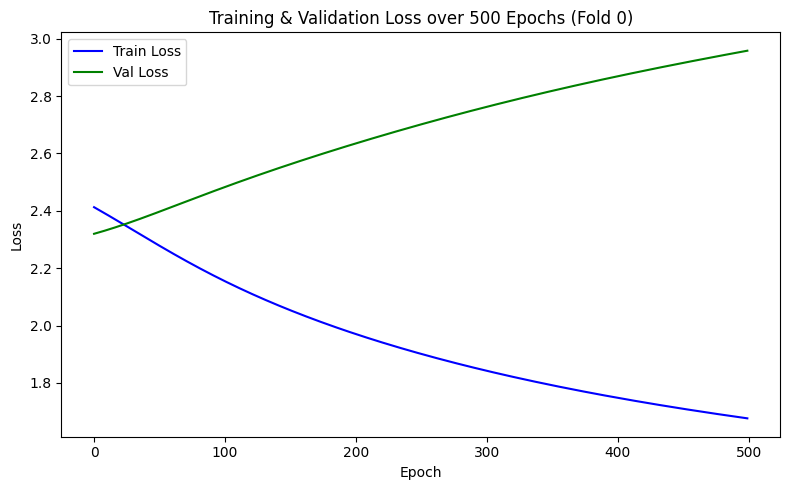

In [13]:
plt.figure(figsize=(8,5))

# Training loss (blue)
sns.lineplot(x=range(500), y=test_instance2.fold0_epoch_train_loss, label="Train Loss", color='blue')

# Validation loss (green)
sns.lineplot(x=range(500), y=test_instance2.fold0_epoch_val_loss, label="Val Loss", color='green')

plt.title('Training & Validation Loss over 500 Epochs (Fold 0)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()


### Test loading the model

In [15]:
t2 = FORGE.load_forge(path='full_pipeline_t2.pkl')

FORGE model loaded from: full_pipeline_t2.pkl


In [16]:
t2.__getstate__()

{'exp_path': '/home/nilabjab/cancer_dependency_project_nilabja/cancer_dependency_project/Approach3_Latent_factor/Fresh_FORGE/Data/Exp.csv', 'dep_path': '/home/nilabjab/cancer_dependency_project_nilabja/cancer_dependency_project/Approach3_Latent_factor/Fresh_FORGE/Data/Dep.csv', 'ic50_path': '/home/nilabjab/cancer_dependency_project_nilabja/cancer_dependency_project/Approach3_Latent_factor/Fresh_FORGE/Data/Creammist_common_ic50.csv', 'drug': 'ERLOTINIB', 'target': 'EGFR', 'test_cellLines': Index(['SUDHL1', 'WM1799', 'HUPT3', 'SNU869', 'NCIH2030', 'HCC1806', 'MM1S',
       'HDMYZ', 'M07E', 'DAOY',
       ...
       'SNU398', 'VMRCRCW', 'UACC893', 'TE9', 'JHOS2', 'SNU410', 'RKO',
       'SKMEL2', 'SNU182', 'YKG1'],
      dtype='object', name='StrippedCellLineName', length=137), 'training_cv_splits': [(Index(['HT115', 'KE97', 'SCC3', 'SNU761', 'KOSC2', 'NCIH209', 'CADOES1',
       'HPAFII', 'IPC298', 'PK45H',
       ...
       'A431', 'MEC1', 'TCCSUP', 'G292CLONEA141B1', 'KMS27', 'ACCMESO1

{'exp_path': '/home/nilabjab/cancer_dependency_project_nilabja/cancer_dependency_project/Approach3_Latent_factor/Fresh_FORGE/Data/Exp.csv',
 'dep_path': '/home/nilabjab/cancer_dependency_project_nilabja/cancer_dependency_project/Approach3_Latent_factor/Fresh_FORGE/Data/Dep.csv',
 'ic50_path': '/home/nilabjab/cancer_dependency_project_nilabja/cancer_dependency_project/Approach3_Latent_factor/Fresh_FORGE/Data/Creammist_common_ic50.csv',
 'drug': 'ERLOTINIB',
 'target': 'EGFR',
 'test_cellLines': Index(['SUDHL1', 'WM1799', 'HUPT3', 'SNU869', 'NCIH2030', 'HCC1806', 'MM1S',
        'HDMYZ', 'M07E', 'DAOY',
        ...
        'SNU398', 'VMRCRCW', 'UACC893', 'TE9', 'JHOS2', 'SNU410', 'RKO',
        'SKMEL2', 'SNU182', 'YKG1'],
       dtype='object', name='StrippedCellLineName', length=137),
 'training_cv_splits': [(Index(['HT115', 'KE97', 'SCC3', 'SNU761', 'KOSC2', 'NCIH209', 'CADOES1',
          'HPAFII', 'IPC298', 'PK45H',
          ...
          'A431', 'MEC1', 'TCCSUP', 'G292CLONEA141B1'

#### Dummy run 1

In [7]:
# create 5-fold cv for the model
test_instance = FORGE(exp_path=exp_path, dependency_path=dep_path,
                      ic50_path=ic50_path, drug_name=drug_name, 
                      target_name=target_gene, hcg_list=hcg_list)


Cleaning the input datasets..
Identified a total of 687 samples in input data


In [8]:
test_instance.__getstate__()

{'exp_path': '/home/nilabjab/cancer_dependency_project_nilabja/cancer_dependency_project/Approach3_Latent_factor/Fresh_FORGE/Data/Exp.csv', 'dep_path': '/home/nilabjab/cancer_dependency_project_nilabja/cancer_dependency_project/Approach3_Latent_factor/Fresh_FORGE/Data/Dep.csv', 'ic50_path': '/home/nilabjab/cancer_dependency_project_nilabja/cancer_dependency_project/Approach3_Latent_factor/Fresh_FORGE/Data/Creammist_common_ic50.csv', 'drug': 'ERLOTINIB', 'target': 'EGFR'}


{'exp_path': '/home/nilabjab/cancer_dependency_project_nilabja/cancer_dependency_project/Approach3_Latent_factor/Fresh_FORGE/Data/Exp.csv',
 'dep_path': '/home/nilabjab/cancer_dependency_project_nilabja/cancer_dependency_project/Approach3_Latent_factor/Fresh_FORGE/Data/Dep.csv',
 'ic50_path': '/home/nilabjab/cancer_dependency_project_nilabja/cancer_dependency_project/Approach3_Latent_factor/Fresh_FORGE/Data/Creammist_common_ic50.csv',
 'drug': 'ERLOTINIB',
 'target': 'EGFR'}

In [9]:
test_instance.get_train_val_test_kSplits(n_splits = 5, seed=198716)

Performing k-fold split over 687 samples...


In [10]:
train_ids1 = test_instance.training_cv_splits[0][0]

In [11]:
len(train_ids1)

440

In [12]:
val_ids1 = test_instance.training_cv_splits[0][1]

In [13]:
len(val_ids1)

110

In [14]:
len(test_instance.test_cellLines)

137

In [15]:
test_instance.__getstate__()

{'exp_path': '/home/nilabjab/cancer_dependency_project_nilabja/cancer_dependency_project/Approach3_Latent_factor/Fresh_FORGE/Data/Exp.csv', 'dep_path': '/home/nilabjab/cancer_dependency_project_nilabja/cancer_dependency_project/Approach3_Latent_factor/Fresh_FORGE/Data/Dep.csv', 'ic50_path': '/home/nilabjab/cancer_dependency_project_nilabja/cancer_dependency_project/Approach3_Latent_factor/Fresh_FORGE/Data/Creammist_common_ic50.csv', 'drug': 'ERLOTINIB', 'target': 'EGFR', 'test_cellLines': Index(['HCC1419', 'RI1', 'EFO21', 'NCIH2087', 'IMR32', '253J', 'KYSE140',
       'M059K', 'BICR16', 'PATU8988T',
       ...
       'HCC33', 'TE4', 'WM88', 'ECGI10', 'SKNDZ', 'BICR31', 'COLO678', 'HEYA8',
       'SNU1079', 'MV411'],
      dtype='object', name='StrippedCellLineName', length=137), 'training_cv_splits': [(Index(['769P', 'COV504', 'PANC0203', 'HUG1N', 'SUDHL10', 'KMM1', 'RCC10RGB',
       'KP3', '22RV1', 'KYSE180',
       ...
       'DLD1', 'AU565', 'DMS273', 'G292CLONEA141B1', 'TYKNU', '6

{'exp_path': '/home/nilabjab/cancer_dependency_project_nilabja/cancer_dependency_project/Approach3_Latent_factor/Fresh_FORGE/Data/Exp.csv',
 'dep_path': '/home/nilabjab/cancer_dependency_project_nilabja/cancer_dependency_project/Approach3_Latent_factor/Fresh_FORGE/Data/Dep.csv',
 'ic50_path': '/home/nilabjab/cancer_dependency_project_nilabja/cancer_dependency_project/Approach3_Latent_factor/Fresh_FORGE/Data/Creammist_common_ic50.csv',
 'drug': 'ERLOTINIB',
 'target': 'EGFR',
 'test_cellLines': Index(['HCC1419', 'RI1', 'EFO21', 'NCIH2087', 'IMR32', '253J', 'KYSE140',
        'M059K', 'BICR16', 'PATU8988T',
        ...
        'HCC33', 'TE4', 'WM88', 'ECGI10', 'SKNDZ', 'BICR31', 'COLO678', 'HEYA8',
        'SNU1079', 'MV411'],
       dtype='object', name='StrippedCellLineName', length=137),
 'training_cv_splits': [(Index(['769P', 'COV504', 'PANC0203', 'HUG1N', 'SUDHL10', 'KMM1', 'RCC10RGB',
          'KP3', '22RV1', 'KYSE180',
          ...
          'DLD1', 'AU565', 'DMS273', 'G292CLONE

In [16]:
test_instance.train_forge(train_ids = train_ids1, val_ids = val_ids1,
    optuna_trials=5, tuning_epochs = 10, training_epochs = 50)
    

Scaling the matrices...
Starting FORGE training with single random instance of W..
Tuning hyper-params..

--- Starting Optuna search for ERLOTINIB - EGFR ---


[I 2025-11-21 13:04:51,217] Using an existing study with name 'ERLOTINIB-EGFR_optuna_198716' instead of creating a new one.
[I 2025-11-21 13:04:51,303] Trial 13 finished with value: 4.004030190850534 and parameters: {'latent_dim': 10, 'learning_rate': 0.013505103108265673, 'lambda': 0.014737389140896708}. Best is trial 8 with value: 2.770812335674627.
[I 2025-11-21 13:04:51,379] Trial 14 finished with value: 2.7522939179826165 and parameters: {'latent_dim': 40, 'learning_rate': 0.0012199084798959823, 'lambda': 0.027204643340163395}. Best is trial 14 with value: 2.7522939179826165.
[I 2025-11-21 13:04:51,423] Trial 15 finished with value: 2.3966847287298716 and parameters: {'latent_dim': 10, 'learning_rate': 0.0006473392000837237, 'lambda': 0.01751195566227947}. Best is trial 15 with value: 2.3966847287298716.


Validation loss at end of trial <optuna.trial._trial.Trial object at 0x7f19befce900>: 4.00403
Validation loss at end of trial <optuna.trial._trial.Trial object at 0x7f19b6913890>: 2.75229
Validation loss at end of trial <optuna.trial._trial.Trial object at 0x7f19b6913890>: 2.39668


[I 2025-11-21 13:04:51,502] Trial 16 finished with value: 2.7436347636618375 and parameters: {'latent_dim': 40, 'learning_rate': 0.0008022639076023696, 'lambda': 0.017554918224027233}. Best is trial 15 with value: 2.3966847287298716.
[I 2025-11-21 13:04:51,567] Trial 17 finished with value: 2.582676978850033 and parameters: {'latent_dim': 20, 'learning_rate': 0.00010658739692112596, 'lambda': 0.008686790922722787}. Best is trial 15 with value: 2.3966847287298716.


Validation loss at end of trial <optuna.trial._trial.Trial object at 0x7f19befb23f0>: 2.74363
Validation loss at end of trial <optuna.trial._trial.Trial object at 0x7f19befb2520>: 2.58268
Hyper-param tuning completed in 0.34609365463256836 seconds..
Best hyper-params:
{'latent_dim': 10, 'learning_rate': 0.0006473392000837237, 'lambda': 0.01751195566227947}
Training using the best hyper-params..
Final training loss: 1.98692. Validation loss: 2.69068


In [17]:
test_instance.__getstate__()

{'exp_path': '/home/nilabjab/cancer_dependency_project_nilabja/cancer_dependency_project/Approach3_Latent_factor/Fresh_FORGE/Data/Exp.csv', 'dep_path': '/home/nilabjab/cancer_dependency_project_nilabja/cancer_dependency_project/Approach3_Latent_factor/Fresh_FORGE/Data/Dep.csv', 'ic50_path': '/home/nilabjab/cancer_dependency_project_nilabja/cancer_dependency_project/Approach3_Latent_factor/Fresh_FORGE/Data/Creammist_common_ic50.csv', 'drug': 'ERLOTINIB', 'target': 'EGFR', 'test_cellLines': Index(['HCC1419', 'RI1', 'EFO21', 'NCIH2087', 'IMR32', '253J', 'KYSE140',
       'M059K', 'BICR16', 'PATU8988T',
       ...
       'HCC33', 'TE4', 'WM88', 'ECGI10', 'SKNDZ', 'BICR31', 'COLO678', 'HEYA8',
       'SNU1079', 'MV411'],
      dtype='object', name='StrippedCellLineName', length=137), 'training_cv_splits': [(Index(['769P', 'COV504', 'PANC0203', 'HUG1N', 'SUDHL10', 'KMM1', 'RCC10RGB',
       'KP3', '22RV1', 'KYSE180',
       ...
       'DLD1', 'AU565', 'DMS273', 'G292CLONEA141B1', 'TYKNU', '6

{'exp_path': '/home/nilabjab/cancer_dependency_project_nilabja/cancer_dependency_project/Approach3_Latent_factor/Fresh_FORGE/Data/Exp.csv',
 'dep_path': '/home/nilabjab/cancer_dependency_project_nilabja/cancer_dependency_project/Approach3_Latent_factor/Fresh_FORGE/Data/Dep.csv',
 'ic50_path': '/home/nilabjab/cancer_dependency_project_nilabja/cancer_dependency_project/Approach3_Latent_factor/Fresh_FORGE/Data/Creammist_common_ic50.csv',
 'drug': 'ERLOTINIB',
 'target': 'EGFR',
 'test_cellLines': Index(['HCC1419', 'RI1', 'EFO21', 'NCIH2087', 'IMR32', '253J', 'KYSE140',
        'M059K', 'BICR16', 'PATU8988T',
        ...
        'HCC33', 'TE4', 'WM88', 'ECGI10', 'SKNDZ', 'BICR31', 'COLO678', 'HEYA8',
        'SNU1079', 'MV411'],
       dtype='object', name='StrippedCellLineName', length=137),
 'training_cv_splits': [(Index(['769P', 'COV504', 'PANC0203', 'HUG1N', 'SUDHL10', 'KMM1', 'RCC10RGB',
          'KP3', '22RV1', 'KYSE180',
          ...
          'DLD1', 'AU565', 'DMS273', 'G292CLONE

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

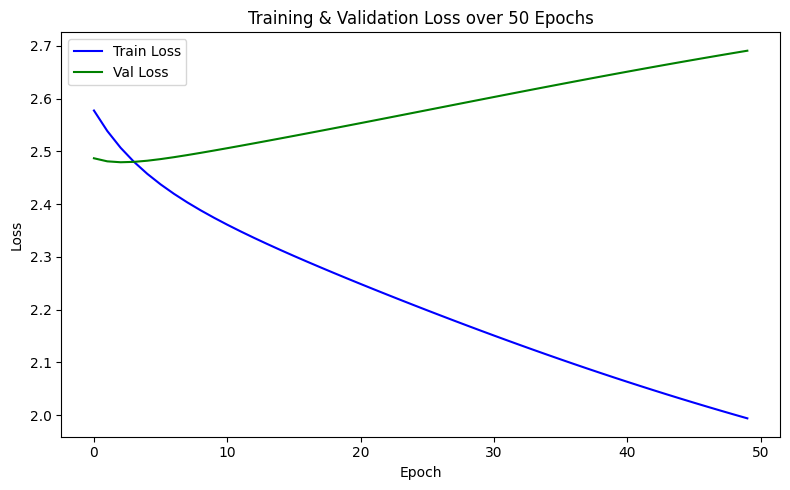

In [19]:
plt.figure(figsize=(8,5))

# Training loss (blue)
sns.lineplot(x=range(50), y=test_instance.epoch_train_loss, label="Train Loss", color='blue')

# Validation loss (green)
sns.lineplot(x=range(50), y=test_instance.epoch_val_loss, label="Val Loss", color='green')

plt.title('Training & Validation Loss over 50 Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()


In [20]:
hcg_list

['ACE2',
 'AGPAT1',
 'AK5',
 'ALPK2',
 'ALS2CL',
 'ANKRD52',
 'ANKS3',
 'ANXA3',
 'AP1M2',
 'AREG',
 'ARHGAP31',
 'ARHGAP8',
 'ARHGEF35',
 'ARHGEF5',
 'B3GNT3',
 'BCL11A',
 'BRD7',
 'C10orf95-AS1',
 'C13orf46',
 'C19orf33',
 'C1orf116',
 'C1orf74',
 'C6orf132',
 'CALU',
 'CAPN1',
 'CCNB1IP1',
 'CDC42BPG',
 'CDH1',
 'CDH3',
 'CDS1',
 'CEP295NL',
 'CHMP4C',
 'CHPF2',
 'CLDN4',
 'CLDN7',
 'COL6A1',
 'COL6A2',
 'COL6A3',
 'CRB3',
 'CRYBG2',
 'CXCL16',
 'DAB2',
 'DAPP1',
 'DDR1',
 'DDR2',
 'DENRP2',
 'DPP9-AS1',
 'DSC2',
 'DSG2',
 'DSG2-AS1',
 'DSP',
 'EFNA1',
 'EGFR',
 'ELF3',
 'EPHA1',
 'EPS8L2',
 'F11R',
 'FAM83H',
 'FBXO34',
 'FGD3',
 'FGFBP1',
 'FGFR1',
 'FGFRL1',
 'FRK',
 'GALNT3',
 'GJB3',
 'GMPPB',
 'GNA11',
 'GPBP1L1',
 'GRAMD2A',
 'GRB7',
 'HABP4',
 'HECA',
 'HLA-V',
 'HPCAL1',
 'IL18',
 'INAVA',
 'IQANK1',
 'IRF6',
 'ITGB4',
 'ITGB5',
 'ITGB6',
 'ITPKC',
 'JUP',
 'KANK2',
 'KCNK1',
 'KLF2',
 'KLF5',
 'LAD1',
 'LAMA3',
 'LAMB3',
 'LAMC2',
 'LCN2',
 'LIPH',
 'LNC-WAL',
 'LRRC59-AS1